<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8CEF6;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Social Media and Entertainment Dataset <br>
    (EDA / ML / DL)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Social Media and Entertainment Dataset (EDA / ML / DL) (Classification)</div>**


## Goal
> ## EDA : Data Distribution, Column Analysis
> ## Modeling : Predicting Preferred Entertainment Platform

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import math
import warnings

warnings.filterwarnings("ignore")

# For Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.exceptions import FitFailedWarning

# For Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('/kaggle/input/social-media-and-entertainment-dataset/social_media_entertainment_data.csv')
df.head()

,User ID,Age,Gender,Country,Daily Social Media Time (hrs),Daily Entertainment Time (hrs),Social Media Platforms Used,Primary Platform,Daily Messaging Time (hrs),Daily Video Content Time (hrs),...,Ad Interaction Count,Time on Educational Platforms (hrs),Parental Status,Tech Savviness Level (scale 1-10),Preferred Device for Entertainment,Data Plan Used,Digital Well-being Awareness,Sleep Quality (scale 1-10),Social Isolation Feeling (scale 1-10),Monthly Expenditure on Entertainment (USD)
0,1,32,Other,Germany,4.35,4.08,5,TikTok,0.35,5.43,...,20,4.11,Yes,9,Tablet,50GB,Moderate,7,8,33.04
1,2,62,Other,India,4.96,4.21,2,YouTube,2.55,4.22,...,26,4.59,Yes,9,PC,10GB,Low,8,2,497.78
2,3,51,Female,USA,6.78,1.77,4,Facebook,2.09,1.09,...,47,0.66,Yes,9,Tablet,10GB,High,5,3,71.72
3,4,44,Female,India,5.06,9.21,3,YouTube,3.69,4.80,...,22,3.44,Yes,7,Tablet,10GB,Low,9,9,129.62
4,5,21,Other,Germany,2.57,1.30,4,TikTok,3.97,2.74,...,42,4.14,Yes,7,Smart TV,Unlimited,Low,5,9,35.90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   User ID                                     300000 non-null  int64  
 1   Age                                         300000 non-null  int64  
 2   Gender                                      300000 non-null  object 
 3   Country                                     300000 non-null  object 
 4   Daily Social Media Time (hrs)               300000 non-null  float64
 5   Daily Entertainment Time (hrs)              300000 non-null  float64
 6   Social Media Platforms Used                 300000 non-null  int64  
 7   Primary Platform                            300000 non-null  object 
 8   Daily Messaging Time (hrs)                  300000 non-null  float64
 9   Daily Video Content Time (hrs)              300000 non-null  float64
 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,300000.0,150000.500000,86602.684716,1.00,75000.7500,150000.50,225000.250,300000.00
Age,300000.0,38.530547,15.005038,13.00,26.0000,39.00,52.000,65.00
Daily Social Media Time (hrs),300000.0,4.254808,2.165604,0.50,2.3800,4.26,6.130,8.00
Daily Entertainment Time (hrs),300000.0,5.244080,2.741804,0.50,2.8700,5.24,7.620,10.00
Social Media Platforms Used,300000.0,3.000143,1.413682,1.00,2.0000,3.00,4.000,5.00
Daily Messaging Time (hrs),300000.0,2.598320,1.385418,0.20,1.4000,2.60,3.790,5.00
Daily Video Content Time (hrs),300000.0,3.749153,1.877316,0.50,2.1200,3.75,5.370,7.00
Daily Gaming Time (hrs),300000.0,2.499733,1.443159,0.00,1.2500,2.50,3.750,5.00
Monthly Income (USD),300000.0,5256.918848,2741.260952,500.01,2883.8175,5259.01,7630.525,9999.93
Internet Speed (Mbps),300000.0,52.481476,27.394893,5.00,28.7300,52.47,76.210,100.00


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Gender,300000,3,Other,100225
Country,300000,6,USA,50145
Primary Platform,300000,5,TikTok,60301
Occupation,300000,4,Professional,75332
Marital Status,300000,4,Divorced,75377
Device Type,300000,3,Smartphone,100142
Preferred Content Type,300000,4,Movies,75217
Primary Social Media Goal,300000,4,News,75360
Preferred Entertainment Platform,300000,4,Netflix,75238
Parental Status,300000,2,Yes,150287


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [6]:
df.drop('User ID', axis=1, inplace = True)

print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Age                                           0.0
Gender                                        0.0
Country                                       0.0
Daily Social Media Time (hrs)                 0.0
Daily Entertainment Time (hrs)                0.0
Social Media Platforms Used                   0.0
Primary Platform                              0.0
Daily Messaging Time (hrs)                    0.0
Daily Video Content Time (hrs)                0.0
Daily Gaming Time (hrs)                       0.0
Occupation                                    0.0
Marital Status                                0.0
Monthly Income (USD)                          0.0
Device Type                                   0.0
Internet Speed (Mbps)                         0.0
Subscription Platforms                        0.0
Average Sleep Time (hrs)                      0.0
Physical Activity Time (hrs)                  0.0
Reading Time (hrs)                            0.0
Work/Study Time (hrs)           

In [7]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)

total_rows = len(df)
outlier_count = len(outliers)
outlier_ratio = (outlier_count / total_rows) * 100

if outliers.empty:
    print("No outliers")
else:
    print(f"Number of Outliers: {outlier_count}")
    print(f"Outlier Ratio: {outlier_ratio:.2f}%")

No outliers


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

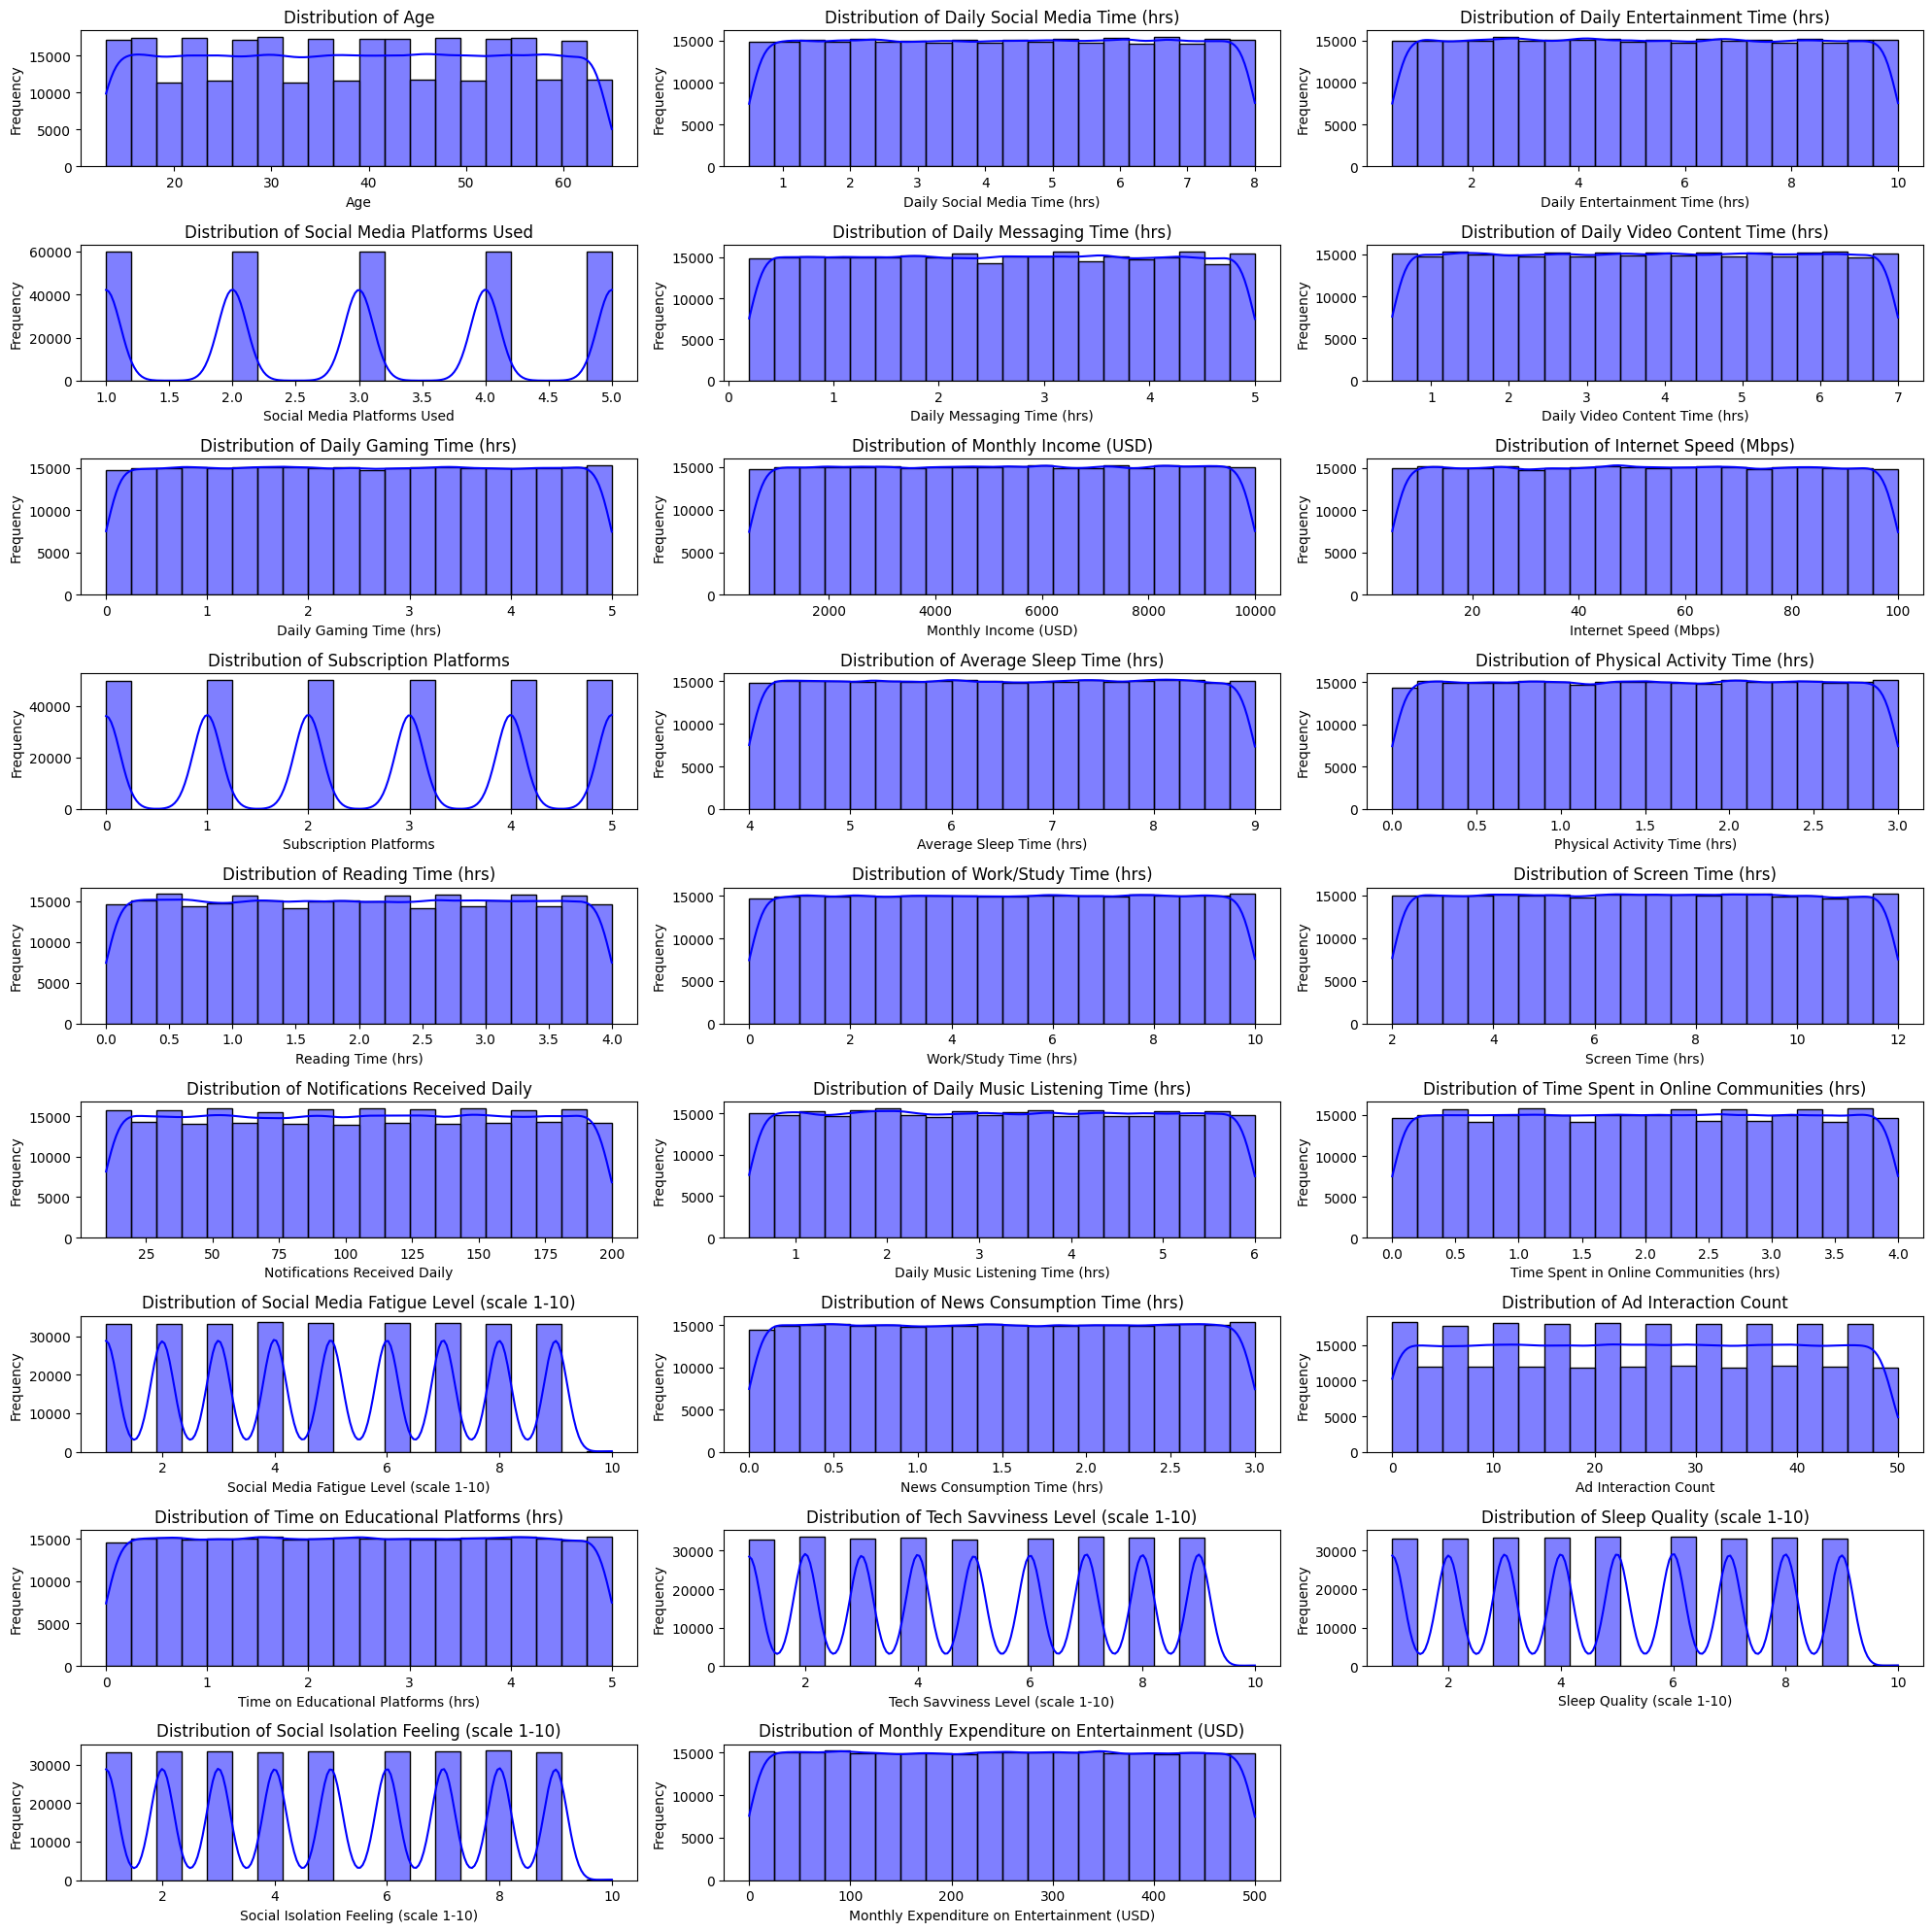

In [8]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(20, 20))

num_columns = len(numeric_columns)
cols = 3  
rows = math.ceil(num_columns / cols)  

for i, col in enumerate(numeric_columns):
    plt.subplot(rows, cols, i + 1)  
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Correlation Analysis</div>

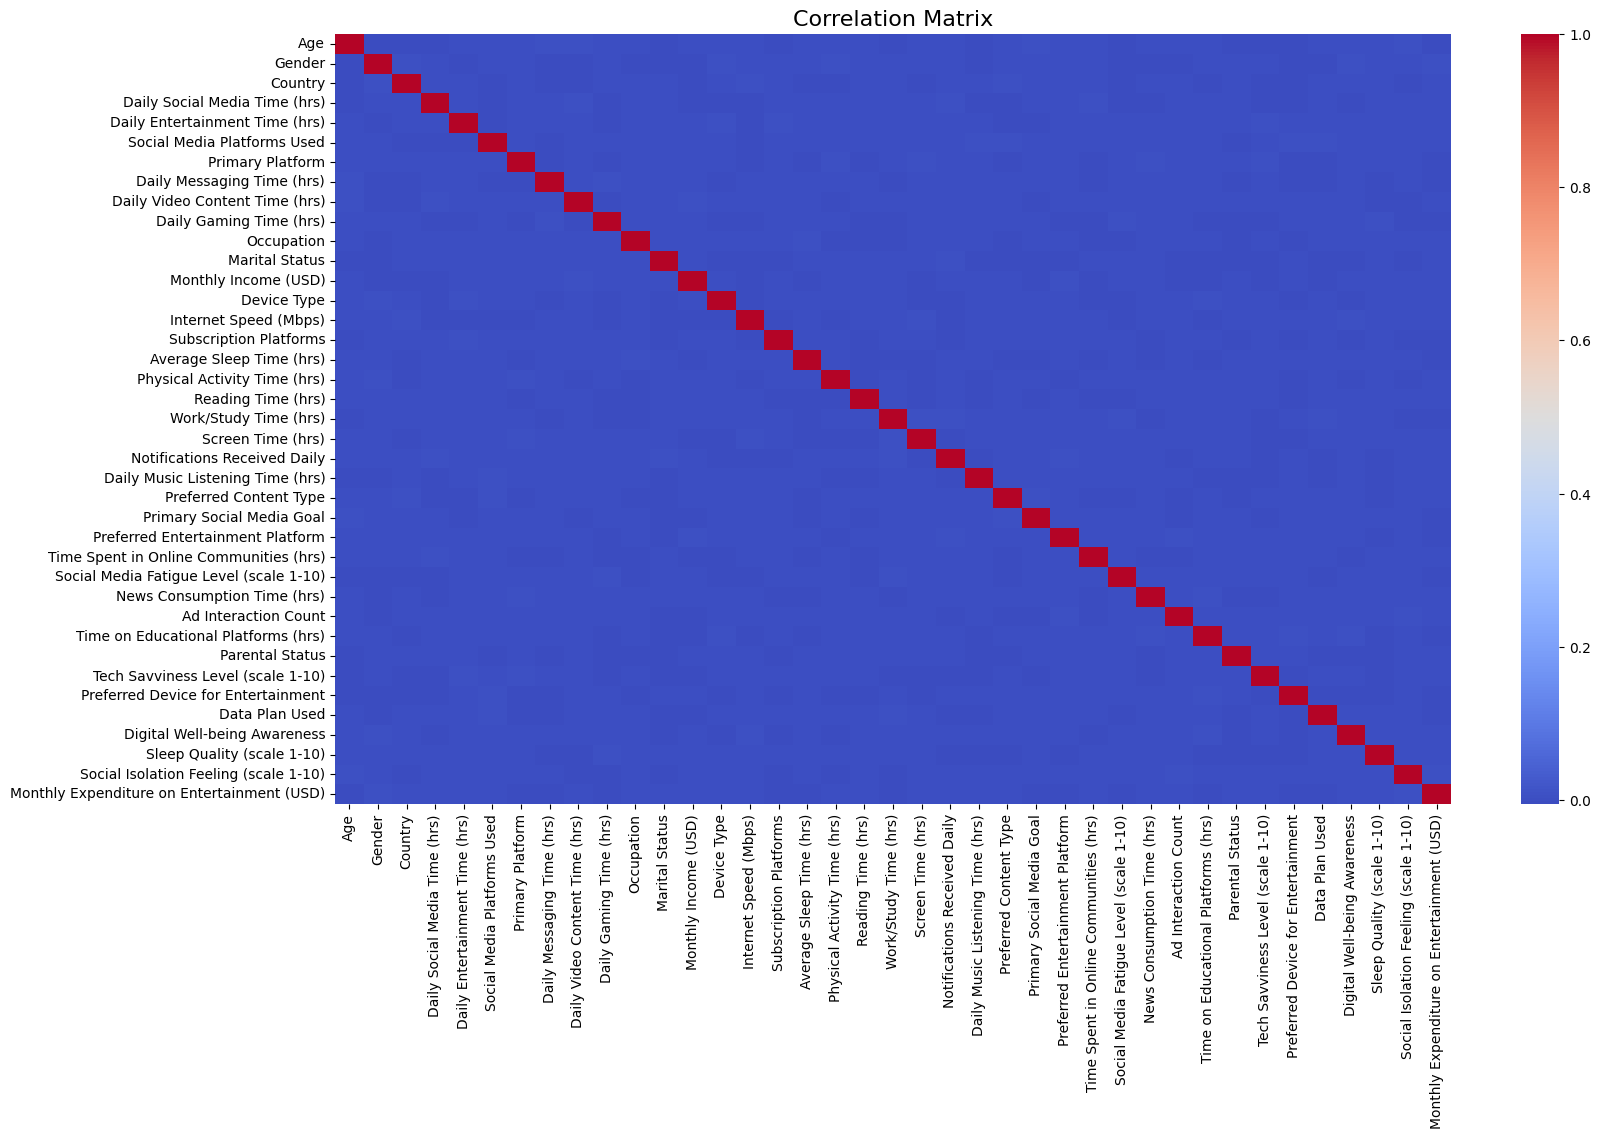

In [9]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Machine Learning Model Performance</div>

In [10]:
X = df.drop('Preferred Entertainment Platform', axis=1)
y = df['Preferred Entertainment Platform']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
#    "KNN": KNeighborsClassifier(n_neighbors=3),
#    "Decision Tree": DecisionTreeClassifier(random_state=42),
#    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [11]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.249683,0.245629,0.249683,0.183919
1,XGBoost,0.247717,0.247663,0.247717,0.247660


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of Deep Learning Model Performance</div>

In [12]:
# NN Model 
simple_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(32, activation='relu'),  
    Dense(4, activation='softmax')  
])

simple_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
simple_nn.summary()

history = simple_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = simple_nn.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,708 (18.39 KB)

 Trainable params: 4,708 (18.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.2497 - loss: 18.6933 - val_accuracy: 0.2470 - val_loss: 2.8129
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2513 - loss: 6.2518 - val_accuracy: 0.2528 - val_loss: 1.8014
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2510 - loss: 3.1364 - val_accuracy: 0.2505 - val_loss: 1.7766
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2480 - loss: 2.0408 - val_accuracy: 0.2470 - val_loss: 1.5446
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2506 - loss: 1.6934 - val_accuracy: 0.2501 - val_loss: 1.4709
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2504 - loss: 1.5159 - val_accuracy: 0.2520 - val_loss: 1.4000
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2523 - loss: 1.4083 - val_accuracy: 0.2494 - val_loss: 1.3864
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.2504 - loss: 1.3864 

In [13]:
# MLP Model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  
])

mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.summary()

history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,508 (52.77 KB)

 Trainable params: 13,508 (52.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.2481 - loss: 21.9144 - val_accuracy: 0.2508 - val_loss: 1.3864
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2510 - loss: 1.3891 - val_accuracy: 0.2494 - val_loss: 1.3864
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2497 - loss: 1.3871 - val_accuracy: 0.2494 - val_loss: 1.3863
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.2514 - loss: 1.3865 - val_accuracy: 0.2494 - val_loss: 1.3863
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2517 - loss: 1.3867 - val_accuracy: 0.2508 - val_loss: 1.3863
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2500 - loss: 1.3867 - val_accuracy: 0.2492 - val_loss: 1.3863
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2502 - loss: 1.3873 - val_accuracy: 0.2492 - val_loss: 1.3865
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.2509 - loss: 

In [14]:
# CNN Model

X_train_np = X_train.values
X_test_np = X_test.values

X_train_reshaped = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1], 1))
X_test_reshaped = X_test_np.reshape((X_test_np.shape[0], X_test_np.shape[1], 1))

cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  
])

cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()

history = cnn_model.fit(
    X_train_reshaped, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

test_loss, test_accuracy = cnn_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 36, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 18, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,316 (145.77 KB)

 Trainable params: 37,316 (145.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.2483 - loss: 8.4141 - val_accuracy: 0.2506 - val_loss: 1.9277
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2516 - loss: 1.9088 - val_accuracy: 0.2497 - val_loss: 1.3863
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2481 - loss: 1.3864 - val_accuracy: 0.2492 - val_loss: 1.3863
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2487 - loss: 1.3864 - val_accuracy: 0.2506 - val_loss: 1.3864
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2511 - loss: 1.3863 - val_accuracy: 0.2492 - val_loss: 1.3864
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2477 - loss: 1.3864 - val_accuracy: 0.2492 - val_loss: 1.3864
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2496 - loss: 1.3864 - val_accuracy: 0.2494 - val_loss: 1.3863
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.2491 - loss: 1

In [15]:
# Optimized Model 
optimized_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

optimized_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
optimized_model.summary()

history = optimized_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = optimized_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,228 (63.39 KB)

 Trainable params: 15,844 (61.89 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.2485 - loss: 1.4353 - val_accuracy: 0.2533 - val_loss: 1.3867
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.2497 - loss: 1.3872 - val_accuracy: 0.2494 - val_loss: 1.3866
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.2499 - loss: 1.3865 - val_accuracy: 0.2496 - val_loss: 1.3865
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.2513 - loss: 1.3865 - val_accuracy: 0.2508 - val_loss: 1.3864
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.2503 - loss: 1.3864 - val_accuracy: 0.2494 - val_loss: 1.3864
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.2507 - loss: 1.3864 - val_accuracy: 0.2508 - val_loss: 1.3863
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.2506 - loss: 1.3864 - val_accuracy: 0.2508 - val_loss: 1.3865
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.2516 - loss: 1

In [16]:
def evaluate_model_on_test(model, X_test, y_test):
    # Predict the class probabilities for each instance in the test set
    y_pred_prob = model.predict(X_test, verbose=0)
    
    # Convert probabilities to class labels (the class with the highest probability)
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

results_deep = []

models_dict = {
    "Simple NN": simple_nn,
    "MLP": mlp_model,
    "CNN": cnn_model,
    "Optimized NN": optimized_model
}

for model_name, model in models_dict.items():
    if model_name == "CNN":  
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test_reshaped, y_test)
    else:
        acc, precision, recall, f1 = evaluate_model_on_test(model, X_test, y_test)
    
    results_deep.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })


results_df2 = pd.DataFrame(results_deep)

print("epoch = 10, batch_size= 32")
results_df2

epoch = 10, batch_size= 32


,Model,Accuracy,Precision,Recall,F1-Score
0,Simple NN,0.248483,0.061749,0.248483,0.098917
1,MLP,0.250517,0.062759,0.250517,0.100372
2,CNN,0.248500,0.061752,0.248500,0.098922
3,Optimized NN,0.250433,0.141010,0.250433,0.100467


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>


Best Model (Machine Learning):
Model        Logistic Regression
Accuracy                0.249683
Precision               0.245629
Recall                  0.249683
F1-Score                0.183919
Name: 0, dtype: object


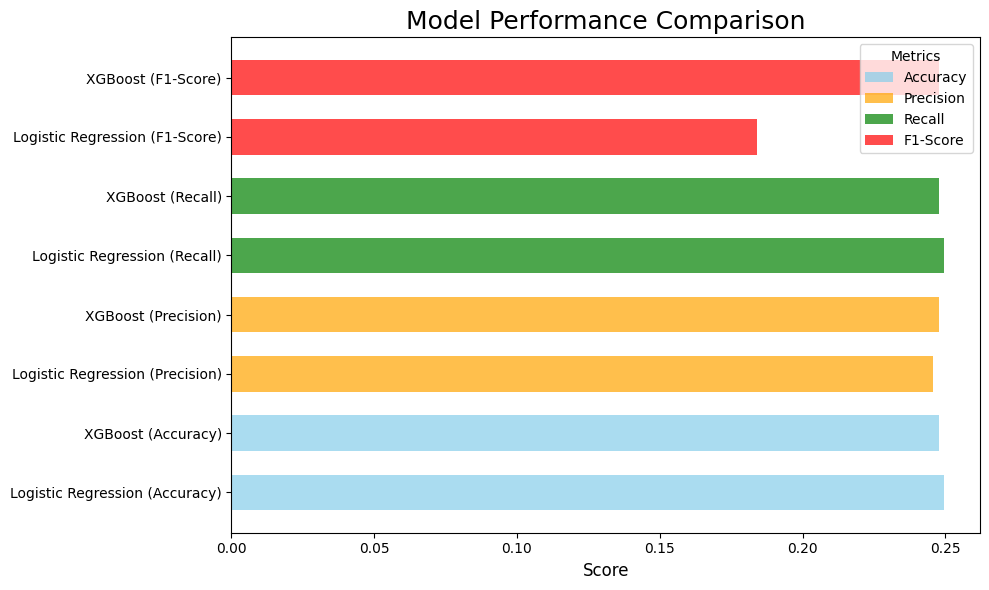


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.2497


In [17]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")


Best Model (Deep Learning):
Model             MLP
Accuracy     0.250517
Precision    0.062759
Recall       0.250517
F1-Score     0.100372
Name: 1, dtype: object


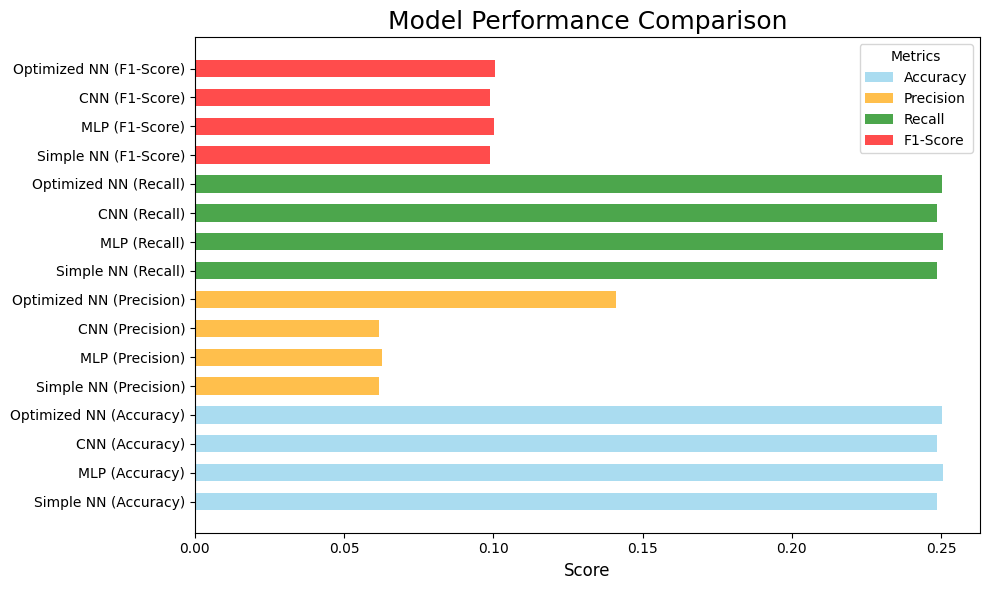


Optimal Model based on Accuracy: MLP with Accuracy = 0.2505


In [18]:
best_model2 = results_df2.loc[results_df2['Accuracy'].idxmax()]
print("\nBest Model (Deep Learning):")
print(best_model2)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

offset = 0.3

for i, metric in enumerate(metrics):
    ax.barh(results_df2['Model'] + f" ({metric})", results_df2[metric], color=colors[i], alpha=0.7, label=metric, height=0.6)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend(title="Metrics")

plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model2['Model']} with Accuracy = {best_model2['Accuracy']:.4f}")


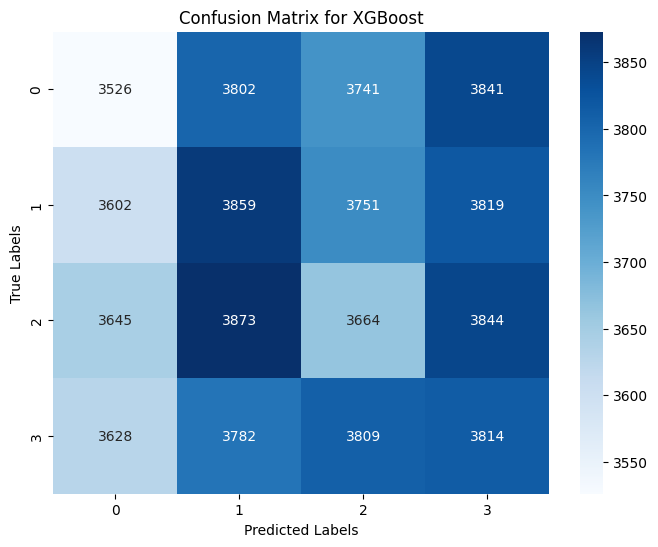


Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.24      0.24     14910
           1       0.25      0.26      0.25     15031
           2       0.24      0.24      0.24     15026
           3       0.25      0.25      0.25     15033

    accuracy                           0.25     60000
   macro avg       0.25      0.25      0.25     60000
weighted avg       0.25      0.25      0.25     60000



In [19]:
model= XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

<h3> If you have any questions, please feel free to ask me a question and use the code freely ! </h3><br>

<div style="text-align: center;">
    <a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
    <a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a></div>